In [12]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns
from scipy.stats import norm

In [8]:
df = pd.read_csv('Titanic_02.csv')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
agelist = df['Age'].dropna().tolist()
print(agelist)

[29.0, 0.9167, 2.0, 30.0, 25.0, 48.0, 63.0, 39.0, 53.0, 71.0, 47.0, 18.0, 24.0, 26.0, 80.0, 24.0, 50.0, 32.0, 36.0, 37.0, 47.0, 26.0, 42.0, 29.0, 25.0, 25.0, 19.0, 35.0, 28.0, 45.0, 40.0, 30.0, 58.0, 42.0, 45.0, 22.0, 41.0, 48.0, 44.0, 59.0, 60.0, 41.0, 45.0, 42.0, 53.0, 36.0, 58.0, 33.0, 28.0, 17.0, 11.0, 14.0, 36.0, 36.0, 49.0, 36.0, 76.0, 46.0, 47.0, 27.0, 33.0, 36.0, 30.0, 45.0, 27.0, 26.0, 22.0, 47.0, 39.0, 37.0, 64.0, 55.0, 70.0, 36.0, 64.0, 39.0, 38.0, 51.0, 27.0, 33.0, 31.0, 27.0, 31.0, 17.0, 53.0, 4.0, 54.0, 50.0, 27.0, 48.0, 48.0, 49.0, 39.0, 23.0, 38.0, 54.0, 36.0, 36.0, 30.0, 24.0, 28.0, 23.0, 19.0, 64.0, 60.0, 30.0, 50.0, 43.0, 22.0, 60.0, 48.0, 37.0, 35.0, 47.0, 35.0, 22.0, 45.0, 24.0, 49.0, 71.0, 53.0, 19.0, 38.0, 58.0, 23.0, 45.0, 46.0, 25.0, 25.0, 48.0, 49.0, 45.0, 35.0, 40.0, 27.0, 24.0, 55.0, 52.0, 42.0, 55.0, 16.0, 44.0, 51.0, 42.0, 35.0, 35.0, 38.0, 35.0, 38.0, 50.0, 49.0, 46.0, 50.0, 32.5, 58.0, 41.0, 42.0, 45.0, 39.0, 49.0, 30.0, 35.0, 42.0, 55.0, 16.0, 51.0, 29.

Q1: 21.0
Q3: 39.0
IQR: 18.0
Lower Bound: -6.0
Upper Bound: 66.0


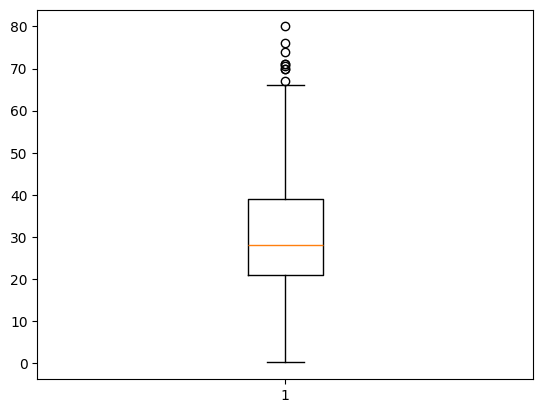

In [10]:
q1 = np.percentile(agelist, 25)
q3 = np.percentile(agelist, 75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
plt.boxplot(agelist)
plt.show()

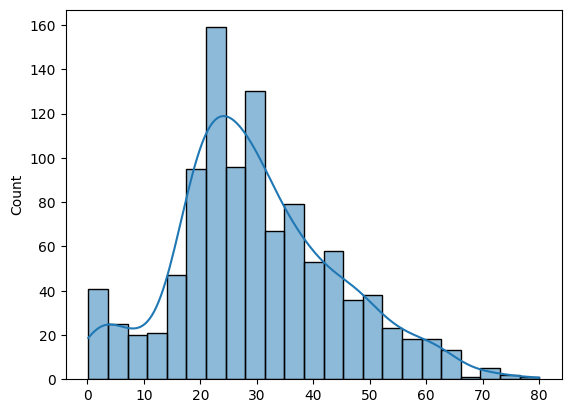

In [13]:
agelist = df['Age'].dropna().tolist()

sns.histplot(agelist, kde=True)

# 中位數和標準差
median_value = np.median(agelist)
std_deviation = np.std(agelist)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, median_value, std_deviation)